In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import os
from dotenv import load_dotenv
from pqdm.threads import pqdm
import logging
    
logging.basicConfig(encoding="utf-8", level=20)
logging.getLogger(__name__).info("CIAO")

load_dotenv()
n_jobs = 32

output_directory = os.path.join("/Users/gianmariospacagna/Documents/GitHub/entourage/entourage-utils/data/runs")

run_id = 'intent_run-2025-02-24-20-40'

INFO:__main__:CIAO


In [ ]:
import os
import json
from restaurant_agent.graph import GraphConfig, get_graph
from restaurant_agent.config import GraphConfig
from entourage_utils import json_utils
from restaurant_agent import config
run_config = config.DEFAULT_RUN_CONFIG

graph_config: GraphConfig = GraphConfig()
print(json_utils.dumps(graph_config.model_dump(), indent=2))

{
  "agent_names": [
    "restaurant_recommender",
    "reflection"
  ],
  "prompt_directory": "/Users/gianmariospacagna/Documents/GitHub/entourage/entourage-utils/restaurant_agent/prompts",
  "prompt_versions": {
    "restaurant_recommender": "v1",
    "reflection": "v1"
  },
  "agent_configs": {
    "restaurant_recommender_agent": {
      "prompt_templates": {
        "system": "# Background\nYou are a super intelligent restaurant recomennder AI agent!\n\n# Goal\nYour goal is to re...",
        "recommend_restaurant": "Provide either a final recommendation, or a web search request, or an error:\n${input}",
        "recommend_restaurant_from_web_results": "Analyze the web results and provide either a final recommendation or an error:\n\n${input}",
        "validation_error": "The output raised a validation error:\n\n${error_message}\n\nFix it and produce a new valid output.",
        "reflection": "Reflection of previous step: ${reflection}."
      },
      "model": "gpt-4o",
      "p

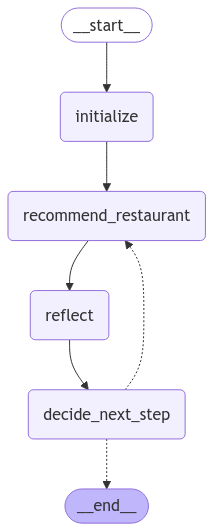

In [7]:
graph = get_graph(graph_config)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
from restaurant_agent.state import Request, State
from entourage_utils.graph_streaming import StreamGraphUpdates

request = Request(
    cuisine="mexican",
    location="Austin, Texas",
    max_price="50$",
)
initial_state = State(request=request)

events = StreamGraphUpdates(
    graph=get_graph(graph_config),
    run_config=run_config,
)(initial_state=initial_state)

INFO:restaurant_agent.graph:>> Executing graph node: initialize
INFO:entourage_utils.graph_streaming:previous state: <class 'dict'> - {}
INFO:entourage_utils.graph_streaming:updated state: <class 'dict'> - {'request': {'cuisine': 'mexican', 'location': 'Austin, Texas', 'max_price': '50$', 'min_rating': None, 'preferences': None}, 'status': <Status.in_progress: 'in_progress'>, 'restaurant': None, 'justification': None, 'reflection': None, 'error': None, 'n_iteration': 0}
INFO:entourage_utils.graph_streaming:diffs: {'status': {'added': <Status.in_progress: 'in_progress'>}, 'request': {'added': {'cuisine': 'mexican', 'location': 'Austin, Texas', 'max_price': '50$', 'min_rating': None, 'preferences': None}}, 'n_iteration': {'added': 0}}
INFO:entourage_utils.graph_streaming:Graph state update event:
================================ #0 initialize =================================
{
  "status": {
    "added": "Status.in_progress"
  },
  "request": {
    "added": {
      "cuisine": "mexican",


In [9]:
request = Request(
    cuisine="carbonara authentic",
    location="Rome, Trastevere",
    min_rating="4.5",
    preferences="has also vegetarian options on the menu",
)
initial_state = State(request=request)

events = StreamGraphUpdates(
    graph=get_graph(graph_config),
    run_config=run_config,
)(initial_state=initial_state)

INFO:restaurant_agent.graph:>> Executing graph node: initialize
INFO:entourage_utils.graph_streaming:previous state: <class 'dict'> - {}
INFO:entourage_utils.graph_streaming:updated state: <class 'dict'> - {'request': {'cuisine': 'carbonara authentic', 'location': 'Rome, Trastevere', 'max_price': None, 'min_rating': '4.5', 'preferences': 'has also vegetarian options on the menu'}, 'status': <Status.in_progress: 'in_progress'>, 'restaurant': None, 'justification': None, 'reflection': None, 'error': None, 'n_iteration': 0}
INFO:entourage_utils.graph_streaming:diffs: {'status': {'added': <Status.in_progress: 'in_progress'>}, 'request': {'added': {'cuisine': 'carbonara authentic', 'location': 'Rome, Trastevere', 'max_price': None, 'min_rating': '4.5', 'preferences': 'has also vegetarian options on the menu'}}, 'n_iteration': {'added': 0}}
INFO:entourage_utils.graph_streaming:Graph state update event:
================================ #0 initialize =================================
{
  "stat

In [12]:
import logging
logger = logging.getLogger(__name__)
thread_id = run_config['configurable']['thread_id']
result_serializable = json_utils.convert_to_serializable(events, truncate=None)
if output_directory:
    path = os.path.join(output_directory, run_id)
    os.makedirs(path, exist_ok=True)
    with open(f"{path}/intent_run-{thread_id}.json", "w") as file:
        json.dump(result_serializable, file, indent=2)
    logger.info(f"Result saved to: {path}/intent_run-{thread_id}.json")

INFO:__main__:Result saved to: /Users/gianmariospacagna/Documents/GitHub/entourage/entourage-utils/data/runs/intent_run-2025-02-24-20-40/intent_run-102.json
